In [ ]:
# Collection of functions for manipulating images.
# We use functions to maintain the numpy data type.
# https://stackoverflow.com/questions/26681756/how-to-convert-a-python-numpy-array-to-an-rgb-image-with-opencv-2-4
#
# For color issues, refer to:
# https://giusedroid.blogspot.com/2015/04/blog-post.html

import numpy as np
import cv2

# Black and white images:
r  = 12  # number of rows
c  = 12  # number of columns
ch = 3   # number of color channels
d_type = np.uint8 # 8-bit characters
black_img = np.zeros((r, c, ch), d_type)
white_img = np.ones ((r, c, ch), d_type)

# Channel indices in OpenCV
# The order works with matplotlib
# PNG and OpenCV order is different
red_ind   = 0  # 0 for plt, 2 in OpenCV
green_ind = 1  # same for both
blue_ind  = 2  # 2 for plt, 0 in OpenCV

# Red image
red_img = black_img.copy()
red_img[:,:,red_ind]   = 255

# Image display using matplotlib
from matplotlib import pyplot as plt
plt.imshow(red_img)
plt.show()

# To save a red image, reverse the indices:
red_img2 = black_img.copy()   # Full copy
red_img2[:,:,:] = (0, 0, 255) # Reverse order
cv2.imwrite('red.png', red_img2.astype(d_type))
# Open PNG file and verify that it is red.

# Fast conversion of the original image can also be done using:
cv_rgb = cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('red2.png', cv_rgb)
# Open PNG file and verify that it is red.


# The following did not work properly:
#from IPython.display import HTML
#HTML("""
#<img src='red.png' width=100>
#""")

[[  0 200   0]
 [100 150  10]
 [  0  50   0]]


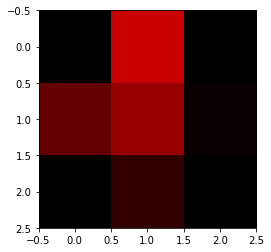

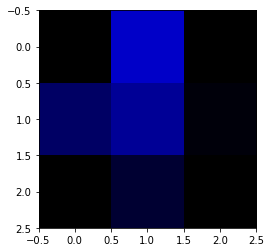

Normalized array = [[ 0.      0.375   0.6875]
 [ 0.125   0.1875  0.25  ]
 [ 0.3125  1.      0.4375]]


In [27]:
# Import the libraries
import cv2
import numpy as np
from   matplotlib import pyplot as plt

# Assume that images are stored using image processing convention:
#   Upper-left  pixel is at row=0, column=0.
#   Lower-right pixel is at:
#     row=number_of_rows-1 and col=number_of_columns-1
# Assume that color is stored in the Red-Green-Blue order

# For imshow() to work, refer to:
#   https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html
#   MxN – values to be mapped (float or int)
#   MxNx3 – RGB (float or uint8)
#   MxNx4 – RGBA (float or uint8) # A is alpha (opacity) and it is not used.
# The value for each component of MxNx3 and MxNx4 float arrays should be in the range 0.0 to 1.0. 
# MxN arrays are mapped to colors based on the norm (mapping scalar to scalar) and the cmap 
# (mapping the normed scalar to a color).

# Colormaps are here:
# https://matplotlib.org/examples/color/colormaps_reference.html

# Array normalization for floating point numbers.
def norm_array(ar2d):
    # Make a new normalized array copy.
    # Do not normalize in place.
    norm_arr = ((ar2d-ar2d.min())/(ar2d.max()-ar2d.min())).copy()
    return(norm_arr)

# Plot a red-green-blue image.
# If (norm) then normalize the image before plotting.
def plt_img(img_rgb, norm=True):
    """The function displays an image using matplotlib.   
    Usage:
        plt_img(img_rgb)             
        """
    plt.imshow(img_rgb) #origin='upper', cmap='brg') 
    plt.show()

    
# Working with ROI images in OpenCV
roi_img = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]],  dtype=np.uint8)

obj_img = np.array([[255, 200, 100],
                    [100, 150, 10],
                    [60,   50,   1]], dtype=np.uint8) 


# Make an image using roi
img = np.zeros((3,3),  dtype=np.uint8)
np.copyto(img, obj_img, where=(roi_img>0)) # Same as: img[roi_img>0] = obj_img[roi_img>0]
print(img)

# Put the image in a grayscale image
img_rgb = cv2.merge((img,img,img)) 

# Display the image
plt_img(img_rgb)

# Put the image into a red image:
# (b,g,r) in OpenCV
# (r,g,b) in Python Matplotlib
# See color operations here:
# http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html
red_img    = cv2.merge((img, np.zeros((3,3),  dtype=np.uint8), np.zeros((3,3),  dtype=np.uint8)))
green_img  = cv2.merge((np.zeros((3,3),  dtype=np.uint8), img, np.zeros((3,3),  dtype=np.uint8))) 
blue_img   = cv2.merge((np.zeros((3,3),  dtype=np.uint8), np.zeros((3,3),  dtype=np.uint8), img)) 
yellow_img = cv2.merge((img, img, np.zeros((3,3),  dtype=np.uint8))) 

# Display the red, green, blue images
plt_img(red_img)
plt_img(green_img)
plt_img(blue_img)
plt_img(yellow_img)



# Float image demonstration:
obj_img_float = np.array([[-0.1, 0.5, 1.0],
                          [0.1, 0.2, 0.3],
                          [0.4, 1.5, 0.6]])
norm_obj = np.empty((3,3))
norm_obj = norm_array(obj_img_float)
print("Normalized array =", norm_obj)

img_red = cv2.merge((norm_obj, np.zeros((3,3)), np.zeros((3,3))))
plt_img(img_red)

In [ ]:
class FastSmallVideoSim:
    """Fast digital video simulator for small videos that fit in memory.
       Usage example: ? Provide usage example here.
    """
    # Initialize the dictionary of background and object images.
    dic_of_back_imgs = {}
    dic_of_obj_imgs  = {}
    
    def __init__(self, video_name, num_of_rows, num_of_cols):
        """Constructor that stores video name and video size."""
        self.video_name  = video_name
        self.num_of_rows = num_of_rows
        self.num_of_cols = num_of_cols
        self.video       = []
        self.obj_locs    = {}
        print("(Initializing {})".format(self.video_name))
        
    def add_back(self, back_name, back_img):
        """Adds a background image for sharing."""
        dic_of_back_imgs[back_name] = back_img
        
    def add_obj(self, obj_name, obj_img, obj_roi):
        """Adds an object image for sharing."""
        obj = (obj_img, obj_roi)
        dic_of_obj_imgs[obj_name] = obj 
        
    def init_video(self, back_name, start_row, start_col):
        """Initialize the video to the background image given by 
           back_name using the corresponding:
            background_image[start_row:start_row+num_of_rows-1, start_col:start_col+num_of_cols-1]."""
        # Create the first video frame using:
        # 1. Store the name of the background image.
        # 2. Extract the video frame from the background
        #    at (start_row, start_col).
        # 3. Use self.video.append() to initialize the video frame.
        
        
    def size(self):
        """Returns the video size in a list containing:
           [number_of_rows, number_of_columns]"""

    def new_frame(self, start_row, start_col):
        """Generates a single frame by extracting a portion of
           the background image."""
        # Same as init_video() but does not change the 
        # background image.

    def place_obj(self, obj_name, start_row, start_col):
        """Place image in the current video frame."""
        # 1. Retrieve the last video frame else print a warning.
        # 2. Write the code to multiply the roi by the object img and place it 
        #    against the bakcground. You need to check if the image fits
        #    inside the background. If it does not fit, you must clip the object
        #    and save the part of the image that fits.
        # 3. Save the object location into a dictionary for the current video. 
        # 4. Update the last video frame.                
        
    def move_obj(self, obj_name, row_motion, col_motion):
        """Place image in the current video frame by moving it using
           row_motion and col_motion pixels"""
        # 1. Retrieve the last saved location of the object from previous frame.
        # 2. Call place_obj() with new coordinates.
        
    def rot_obj(self, obj_name, row_center, col_center, rot_angle):
        """Place image at (row_center, col_center) rotated by rot_angle"""
        
    def scale_obj(self, obj_name, row_center, col_center, scale_factor):
        """Place image at (row_center, col_center) enlarged by scale_factor."""
        
    def play_video():
        """Plays the video on the screen."""
        
    def save_video():
        """Saves the video to a file."""
        

In [ ]:
# List append example
l=[]
l.append("aa")
print(l)

# Wonderful dictionary information can be found at:
#  http://www.python-course.eu/dictionaries.php

In [ ]:
# Use Pickle to provide code that demonstrates how to:
# 1. Save a small video to a file.
# 2. Load a small video from a file.
# Refer to: https://docs.python.org/3/library/pickle.html

# Elegant pickle usage example (1 of 2)
import pickle

# An arbitrary collection of objects supported by pickle.
data = {
    'a': [1, 2.0, 3, 4+6j],
    'b': ("character string", b"byte string"),
    'c': {None, True, False}
}

with open('data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)  

# Delete the data and save memory
del data

In [ ]:
# Elegant pickle usage example (2 of 2)
import pickle

with open('data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)
    
print(data)